<a href="https://colab.research.google.com/github/bida22-070/BIDA22-070/blob/main/Week10_Computer_Vision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exercises 1-6: Install required libraries
# !pip install pandas numpy matplotlib scikit-learn tensorflow opencv-python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# TensorFlow/Keras imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical, load_img, img_to_array
from keras.datasets import mnist, fashion_mnist
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("All libraries imported successfully!")
print(f"OpenCV version: {cv2.__version__}")
print(f"TensorFlow version: {tf.__version__}")

All libraries imported successfully!
OpenCV version: 4.12.0
TensorFlow version: 2.19.0


Created sample image at Image_1.jpg
Using image: Image_1.jpg

EXERCISE 3: OPEN AND DISPLAY IMAGE


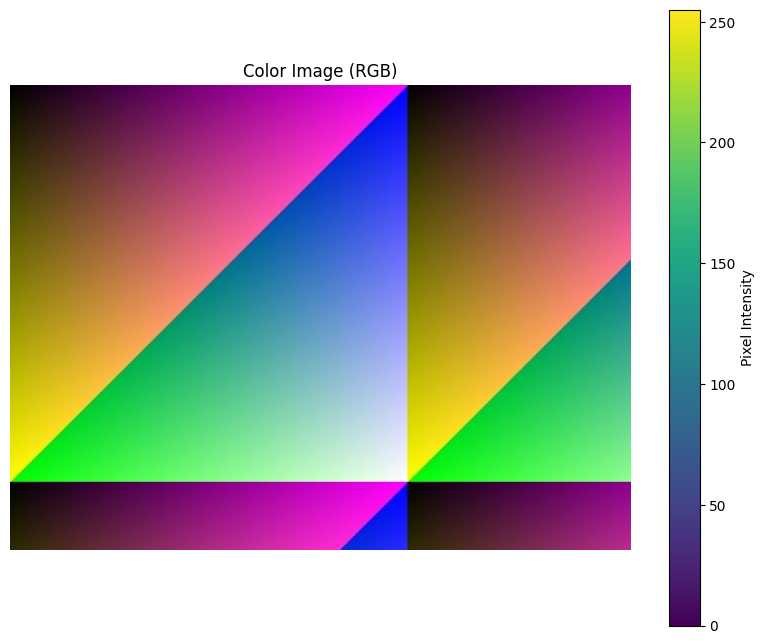

Image shape: (300, 400, 3)
Image dtype: uint8
Image min/max: 0/255

EXERCISE 4: GRAYSCALE IMAGE


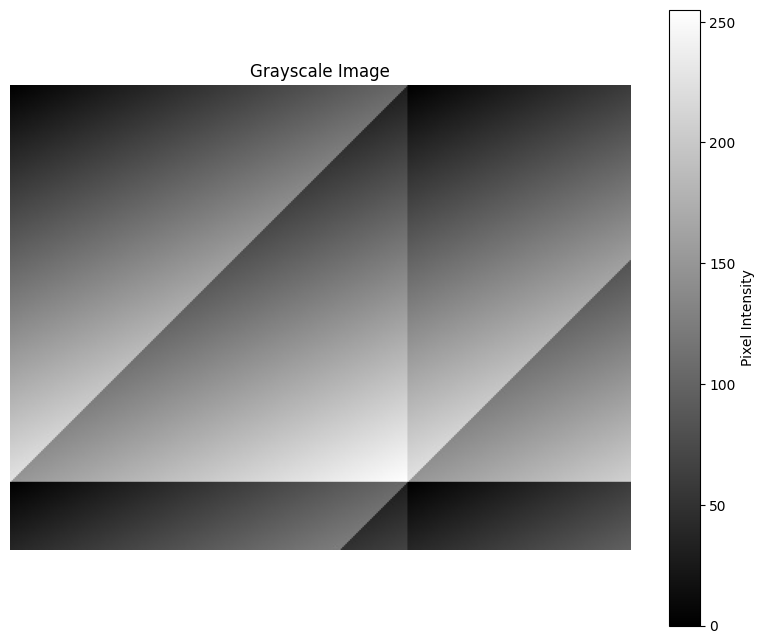

Grayscale image shape: (300, 400)

EXERCISE 5: SAVE GRAYSCALE IMAGE
Grayscale image saved as: grey_scale.jpg

EXERCISE 6: IMAGE RESOLUTION
Color image shape: (300, 400, 3)
Height: 300 pixels
Width: 400 pixels
Channels: 3 (BGR)
Grayscale image shape: (300, 400)
Total pixels: 120000

EXERCISE 7: IMAGE CROPPING


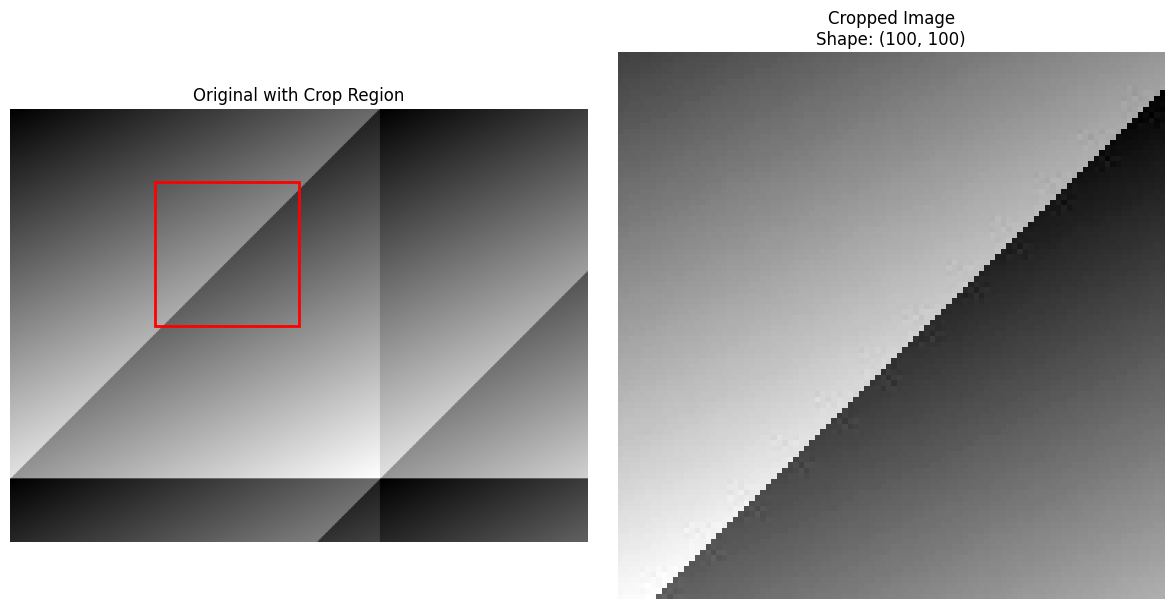

Crop region: y=[50:150], x=[100:200]
Cropped image shape: (100, 100)

EXERCISE 8: IMAGE HISTOGRAM


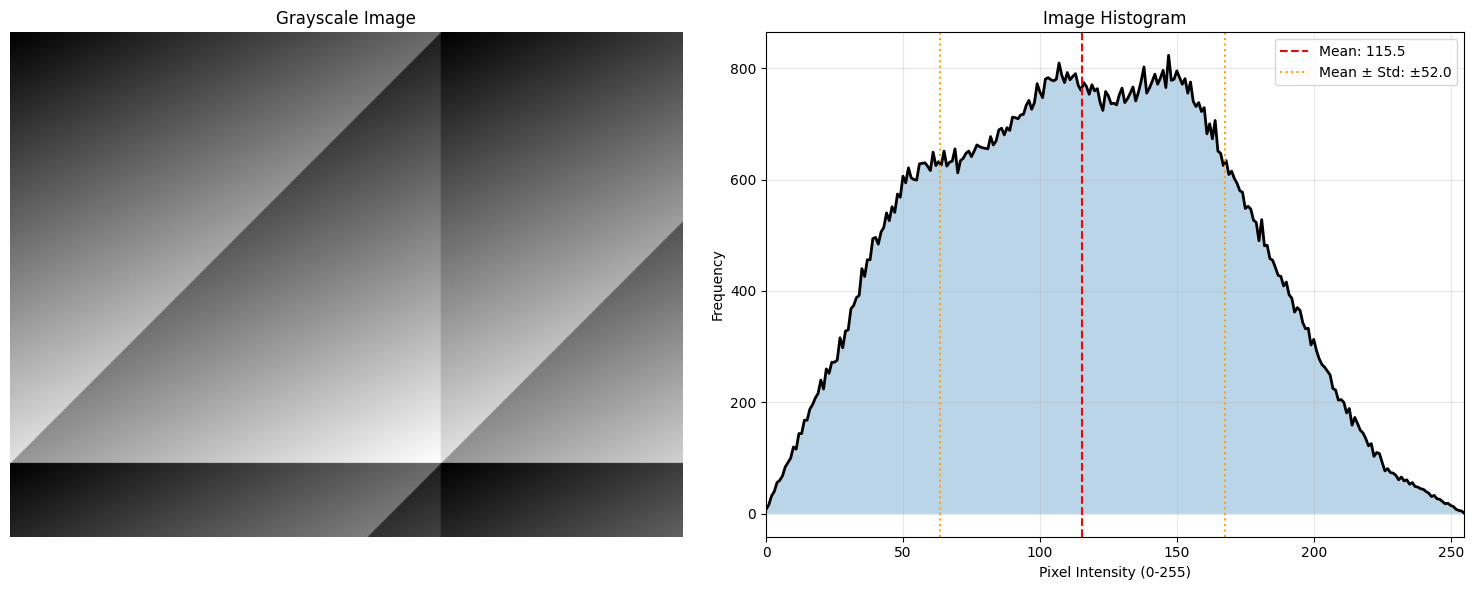

Mean intensity: 115.53
Std intensity: 51.97
Min intensity: 0
Max intensity: 255
Median intensity: 116.00

EXERCISE 9: IMAGE PROCESSING WITH KERAS
Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image format: JPEG
Image mode: RGB
Image size: (400, 300)
Image array shape: (300, 400, 3)
Image array dtype: float32
Image array range: [0.0, 255.0]


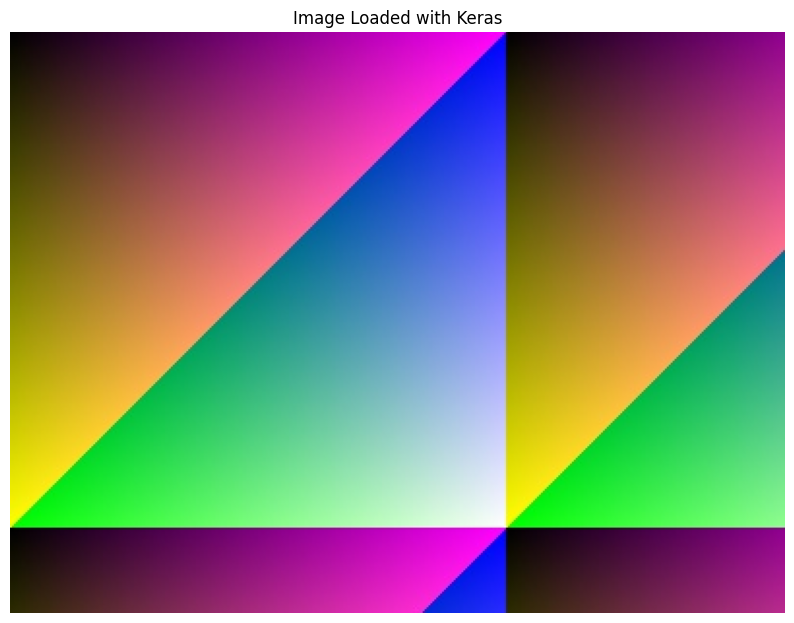

In [ ]:
# Exercise 2: Download and save an image
# Note: You need to download an image and save it as 'Image_1.jpg' in your working directory
# For demonstration, let's create a sample image if none exists
def create_sample_image():
    """Create a sample image if none exists"""
    image_path = Path('Image_1.jpg')
    if not image_path.exists():
        # Create a simple color gradient image
        img = np.zeros((300, 400, 3), dtype=np.uint8)
        for i in range(300):
            for j in range(400):
                img[i, j] = [j % 256, i % 256, (i+j) % 256]
        cv2.imwrite(str(image_path), img)
        print(f"Created sample image at {image_path}")
    return str(image_path)

image_path = create_sample_image()
print(f"Using image: {image_path}")

# Exercise 3: Open and display image using OpenCV and matplotlib
print("\nEXERCISE 3: OPEN AND DISPLAY IMAGE")
print("=" * 50)

# Read image using OpenCV
image_bgr = cv2.imread(image_path)
if image_bgr is None:
    print(f"Error: Could not read image from {image_path}")
else:
    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.title('Color Image (RGB)')
    plt.axis('off')
    plt.colorbar(label='Pixel Intensity')
    plt.show()

    print(f"Image shape: {image_bgr.shape}")
    print(f"Image dtype: {image_bgr.dtype}")
    print(f"Image min/max: {image_bgr.min()}/{image_bgr.max()}")

# Exercise 4: Open image in grayscale
print("\nEXERCISE 4: GRAYSCALE IMAGE")
print("=" * 50)

image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 8))
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.colorbar(label='Pixel Intensity')
plt.show()

print(f"Grayscale image shape: {image_gray.shape}")

# Exercise 5: Save grayscale image
print("\nEXERCISE 5: SAVE GRAYSCALE IMAGE")
print("=" * 50)

gray_path = 'grey_scale.jpg'
cv2.imwrite(gray_path, image_gray)
print(f"Grayscale image saved as: {gray_path}")

# Exercise 6: Get image resolution
print("\nEXERCISE 6: IMAGE RESOLUTION")
print("=" * 50)

print(f"Color image shape: {image_bgr.shape}")
print(f"Height: {image_bgr.shape[0]} pixels")
print(f"Width: {image_bgr.shape[1]} pixels")
print(f"Channels: {image_bgr.shape[2]} (BGR)")
print(f"Grayscale image shape: {image_gray.shape}")
print(f"Total pixels: {image_gray.shape[0] * image_gray.shape[1]}")

# Exercise 7: Crop image
print("\nEXERCISE 7: IMAGE CROPPING")
print("=" * 50)

# Define crop region
y_start, y_end = 50, 150
x_start, x_end = 100, 200

# Crop the image
image_cropped = image_gray[y_start:y_end, x_start:x_end]

# Display original and cropped images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original with crop region highlighted
axes[0].imshow(image_gray, cmap='gray')
# Draw rectangle for crop region
rect = plt.Rectangle((x_start, y_start), x_end-x_start, y_end-y_start,
                     linewidth=2, edgecolor='r', facecolor='none')
axes[0].add_patch(rect)
axes[0].set_title('Original with Crop Region')
axes[0].axis('off')

# Cropped image
axes[1].imshow(image_cropped, cmap='gray')
axes[1].set_title(f'Cropped Image\nShape: {image_cropped.shape}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Crop region: y=[{y_start}:{y_end}], x=[{x_start}:{x_end}]")
print(f"Cropped image shape: {image_cropped.shape}")

# Exercise 8: Image histogram
print("\nEXERCISE 8: IMAGE HISTOGRAM")
print("=" * 50)

# Calculate histogram using OpenCV
hist = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Grayscale image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')

# Histogram
axes[1].plot(hist, color='black', linewidth=2)
axes[1].fill_between(range(256), hist.flatten(), alpha=0.3)
axes[1].set_title('Image Histogram')
axes[1].set_xlabel('Pixel Intensity (0-255)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 255])

# Add statistics
mean_intensity = np.mean(image_gray)
std_intensity = np.std(image_gray)
axes[1].axvline(mean_intensity, color='red', linestyle='--',
                label=f'Mean: {mean_intensity:.1f}')
axes[1].axvline(mean_intensity + std_intensity, color='orange', linestyle=':',
                label=f'Mean ± Std: ±{std_intensity:.1f}')
axes[1].axvline(mean_intensity - std_intensity, color='orange', linestyle=':')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Mean intensity: {mean_intensity:.2f}")
print(f"Std intensity: {std_intensity:.2f}")
print(f"Min intensity: {image_gray.min()}")
print(f"Max intensity: {image_gray.max()}")
print(f"Median intensity: {np.median(image_gray):.2f}")

# Exercise 9: Using Keras for image loading
print("\nEXERCISE 9: IMAGE PROCESSING WITH KERAS")
print("=" * 50)

# Load image using Keras
img = load_img(image_path)
img_array = img_to_array(img)

print(f"Image type: {type(img)}")
print(f"Image format: {img.format}")
print(f"Image mode: {img.mode}")
print(f"Image size: {img.size}")
print(f"Image array shape: {img_array.shape}")
print(f"Image array dtype: {img_array.dtype}")
print(f"Image array range: [{img_array.min():.1f}, {img_array.max():.1f}]")

# Display Keras-loaded image
plt.figure(figsize=(10, 8))
plt.imshow(img_array.astype('uint8'))
plt.title('Image Loaded with Keras')
plt.axis('off')
plt.show()


ADDITIONAL IMAGE PROCESSING TECHNIQUES


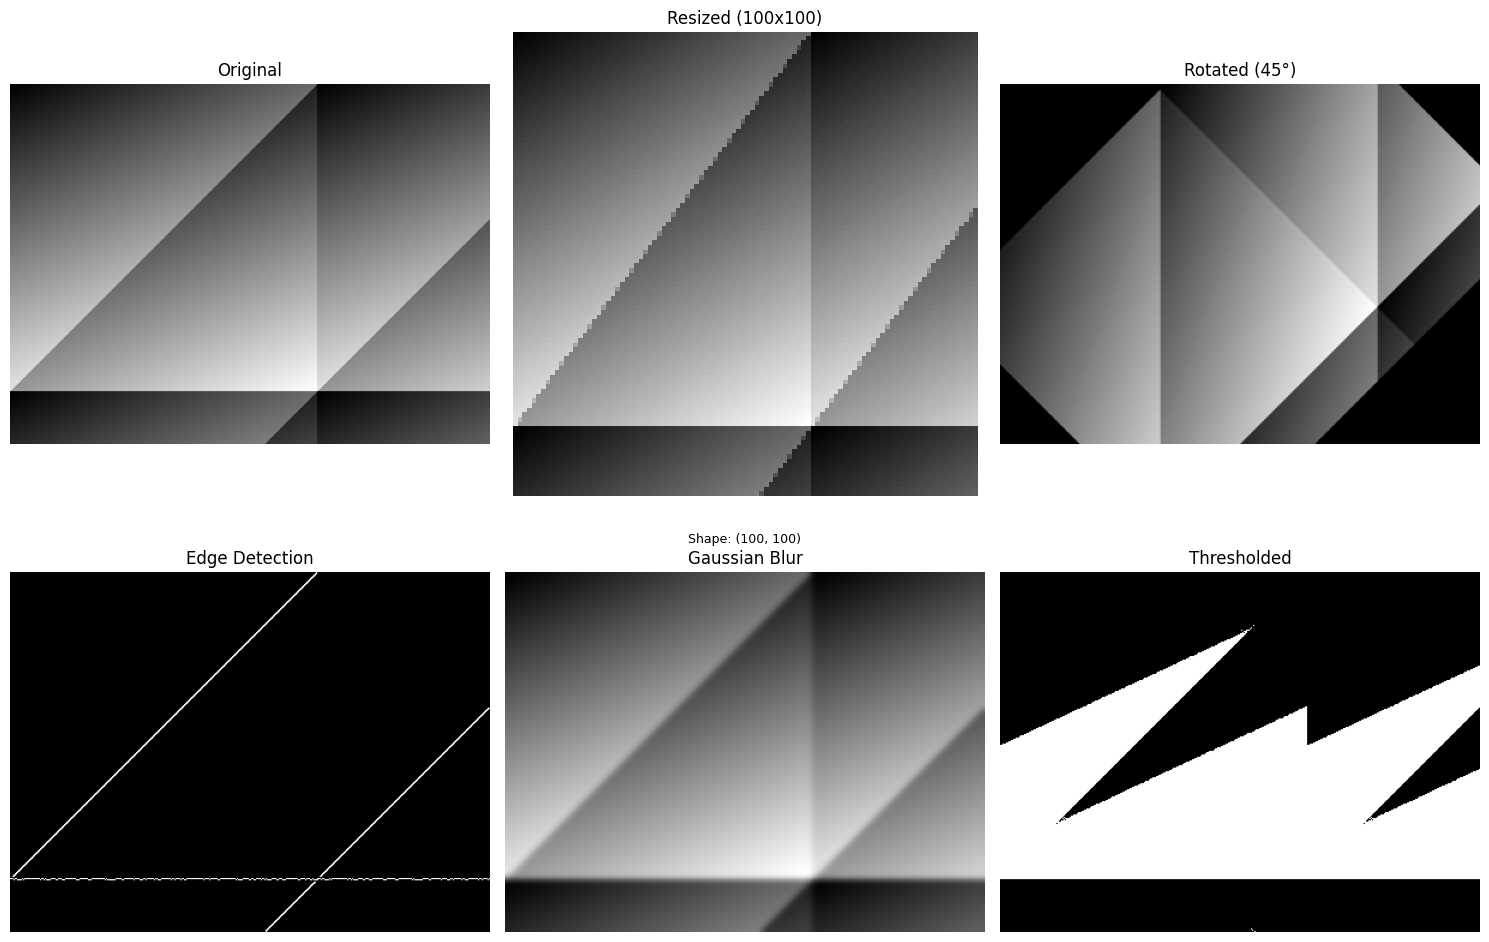


Image Processing Operations Applied:
1. Resizing: Changed image dimensions
2. Rotation: Applied affine transformation
3. Edge Detection: Used Canny edge detector
4. Gaussian Blur: Applied smoothing filter
5. Thresholding: Created binary image


In [ ]:
# Additional image processing techniques
print("\nADDITIONAL IMAGE PROCESSING TECHNIQUES")
print("=" * 50)

# 1. Image resizing
resized_img = cv2.resize(image_gray, (100, 100))

# 2. Image rotation
(h, w) = image_gray.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)  # 45 degree rotation
rotated_img = cv2.warpAffine(image_gray, M, (w, h))

# 3. Edge detection
edges = cv2.Canny(image_gray, 100, 200)

# 4. Gaussian blur
blurred = cv2.GaussianBlur(image_gray, (15, 15), 0)

# 5. Thresholding
_, thresholded = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
operations = [
    ('Original', image_gray, 'gray'),
    ('Resized (100x100)', resized_img, 'gray'),
    ('Rotated (45°)', rotated_img, 'gray'),
    ('Edge Detection', edges, 'gray'),
    ('Gaussian Blur', blurred, 'gray'),
    ('Thresholded', thresholded, 'gray')
]

for idx, (title, img_data, cmap) in enumerate(operations):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img_data, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')

    # Add shape info for resized image
    if title.startswith('Resized'):
        ax.text(0.5, -0.1, f'Shape: {img_data.shape}',
                transform=ax.transAxes, ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nImage Processing Operations Applied:")
print("1. Resizing: Changed image dimensions")
print("2. Rotation: Applied affine transformation")
print("3. Edge Detection: Used Canny edge detector")
print("4. Gaussian Blur: Applied smoothing filter")
print("5. Thresholding: Created binary image")


EXERCISES 11-17: CNN FOR MNIST CLASSIFICATION
Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]

After reshaping:
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)

EXERCISE 13: VISUALIZING MNIST SAMPLES


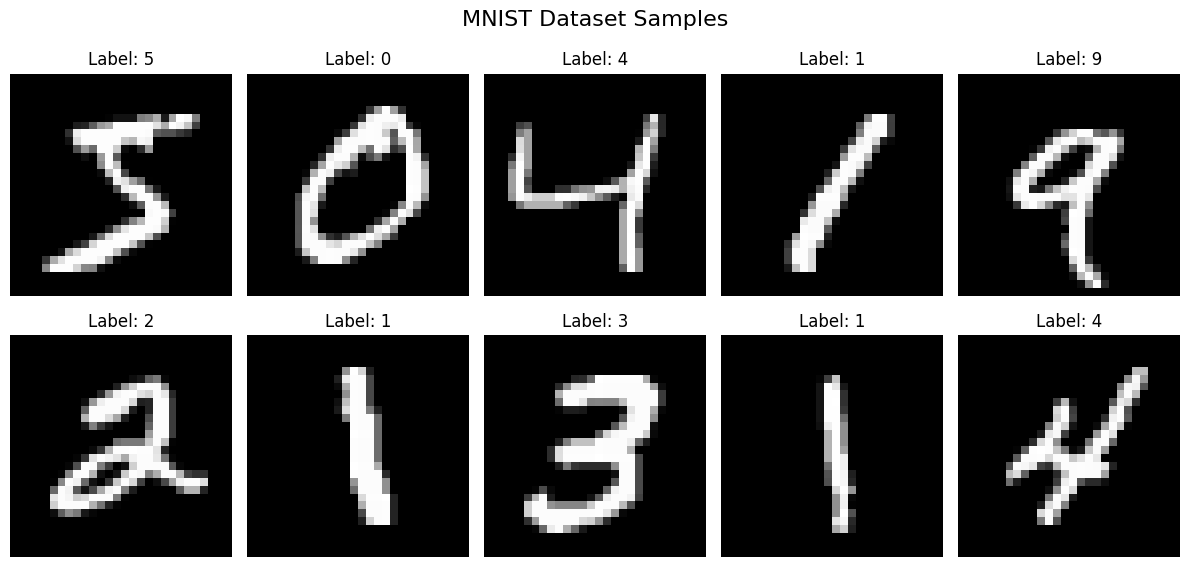

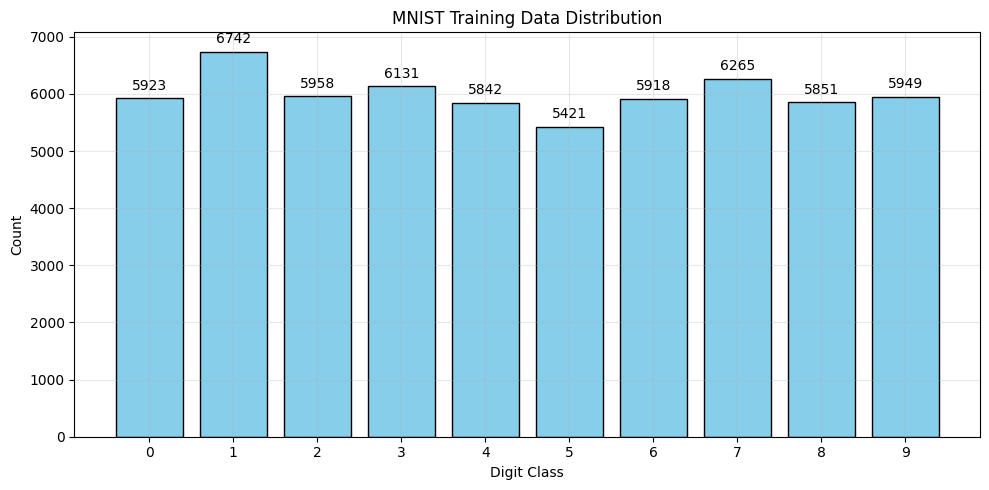

Training set size per class:
  Digit 0: 5923 samples
  Digit 1: 6742 samples
  Digit 2: 5958 samples
  Digit 3: 6131 samples
  Digit 4: 5842 samples
  Digit 5: 5421 samples
  Digit 6: 5918 samples
  Digit 7: 6265 samples
  Digit 8: 5851 samples
  Digit 9: 5949 samples

EXERCISE 14: ONE-HOT ENCODING LABELS
Original y_train[0]: 5
One-hot encoded y_train[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train_categorical shape: (60000, 10)

EXERCISE 15: BUILDING CNN MODEL
Model Architecture:
----------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,906 (3.42 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Model architecture visualization saved as 'cnn_architecture.png'

EXERCISE 16: TRAINING THE CNN MODEL
Starting training...
Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 87s 225ms/step - accuracy: 0.6370 - loss: 1.1731 - precision: 0.7961 - recall: 0.5063 - val_accuracy: 0.9722 - val_loss: 0.0892 - val_precision: 0.9780 - val_recall: 0.9676 - learning_rate: 0.0010
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 207ms/step - accuracy: 0.9336 - loss: 0.2140 - precision: 0.9497 - recall: 0.9200 - val_accuracy: 0.9842 - val_loss: 0.0577 - val_precision: 0.9867 - val_recall: 0.9812 - learning_rate: 0.0010
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 207ms/step - accuracy: 0.9578 - loss: 0.1442 - precision: 0.9683 - recall: 0.9485 - val_accuracy: 0.9858 - val_loss: 0.0468 - val_precision: 0.9875 - val_recall: 0.9842 - learning_rate: 0.0010
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 219ms/step - accuracy: 0.9678 - loss: 0.1130 - precision: 0.9750 - recall: 0.9612 - val_accuracy: 0.9887 - val_loss: 0.042

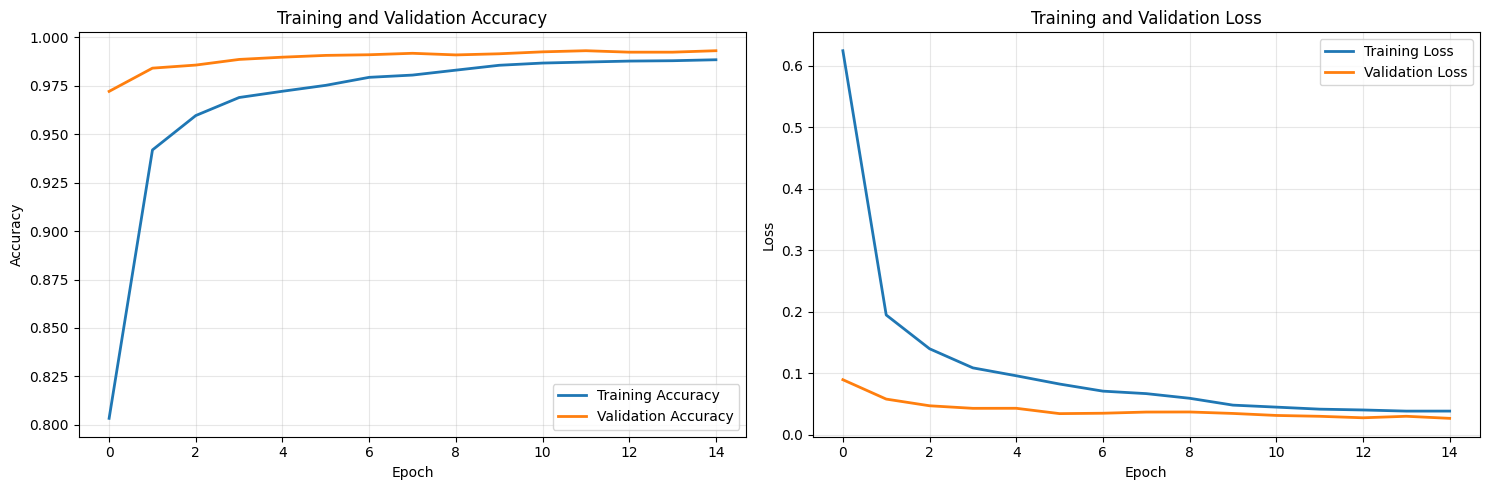


EXERCISE 17: EVALUATING THE MODEL
Test Accuracy: 99.32%
Test Loss: 0.0203
Test Precision: 0.9936
Test Recall: 0.9929
Test F1-Score: 0.9932


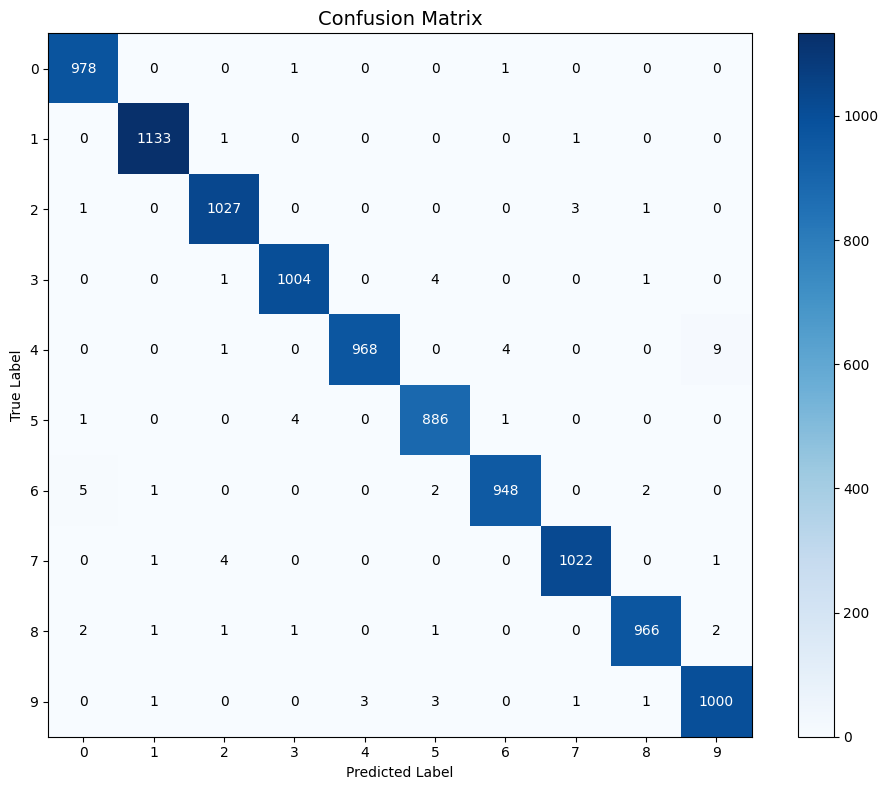


Classification Report:
----------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Exercise 10: Read about CNNs (conceptual understanding)
print("\nEXERCISES 11-17: CNN FOR MNIST CLASSIFICATION")
print("=" * 60)

# Exercise 11-12: Load and prepare MNIST dataset
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Unique labels: {np.unique(y_train)}")

# Reshape and normalize
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print(f"\nAfter reshaping:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Exercise 13: Visualize samples
print("\nEXERCISE 13: VISUALIZING MNIST SAMPLES")
print("=" * 50)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Display images and corresponding labels
num_rows, num_cols = 2, 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i in range(num_rows * num_cols):
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {class_names[y_train[i]]}')
    ax.axis('off')

plt.suptitle('MNIST Dataset Samples', fontsize=16)
plt.tight_layout()
plt.show()

# Display label distribution
plt.figure(figsize=(10, 5))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.title('MNIST Training Data Distribution')
plt.xticks(unique)
plt.grid(True, alpha=0.3)

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"Training set size per class:")
for digit, count in zip(unique, counts):
    print(f"  Digit {digit}: {count} samples")

# Exercise 14: One-hot encode labels
print("\nEXERCISE 14: ONE-HOT ENCODING LABELS")
print("=" * 50)

y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"Original y_train[0]: {y_train[0]}")
print(f"One-hot encoded y_train[0]: {y_train_categorical[0]}")
print(f"y_train_categorical shape: {y_train_categorical.shape}")

# Exercise 15: Build CNN model
print("\nEXERCISE 15: BUILDING CNN MODEL")
print("=" * 50)

model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
           padding='same', kernel_initializer='he_normal'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal'),
    Dropout(0.4),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

print("Model Architecture:")
print("-" * 40)
model.summary()

# Visualize model architecture
try:
    from keras.utils import plot_model
    plot_model(model, to_file='cnn_architecture.png', show_shapes=True,
               show_layer_names=True, dpi=96)
    print("Model architecture visualization saved as 'cnn_architecture.png'")
except ImportError:
    print("Note: Install pydot and graphviz for model visualization")

# Exercise 16: Train the model
print("\nEXERCISE 16: TRAINING THE CNN MODEL")
print("=" * 50)

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]

print("Starting training...")
history = model.fit(
    X_train, y_train_categorical,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

print("\nTraining completed!")

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Exercise 17: Evaluate the model
print("\nEXERCISE 17: EVALUATING THE MODEL")
print("=" * 50)

# Evaluate on test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(
    X_test, y_test_categorical, verbose=0
)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {2 * (test_precision * test_recall) / (test_precision + test_recall):.4f}")

# Generate predictions
predictions = model.predict(X_test, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_categorical, axis=1)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=14)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Add text annotations
thresh = cm.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print("-" * 40)
print(classification_report(true_classes, predicted_classes, target_names=class_names))


EXERCISE 18: ANALYZING PREDICTIONS
Total test samples: 10000
Correctly classified: 9932 (99.32%)
Incorrectly classified: 68 (0.68%)

Visualizing Correct Predictions:
----------------------------------------


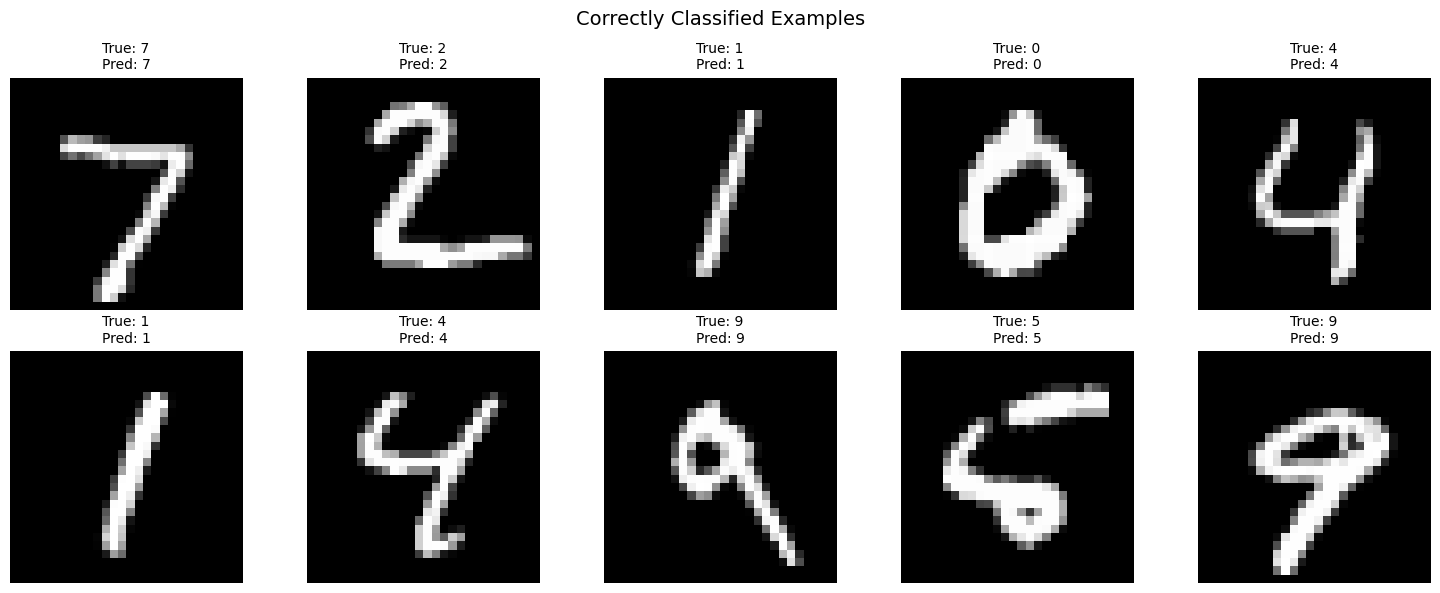


Visualizing Incorrect Predictions:
----------------------------------------


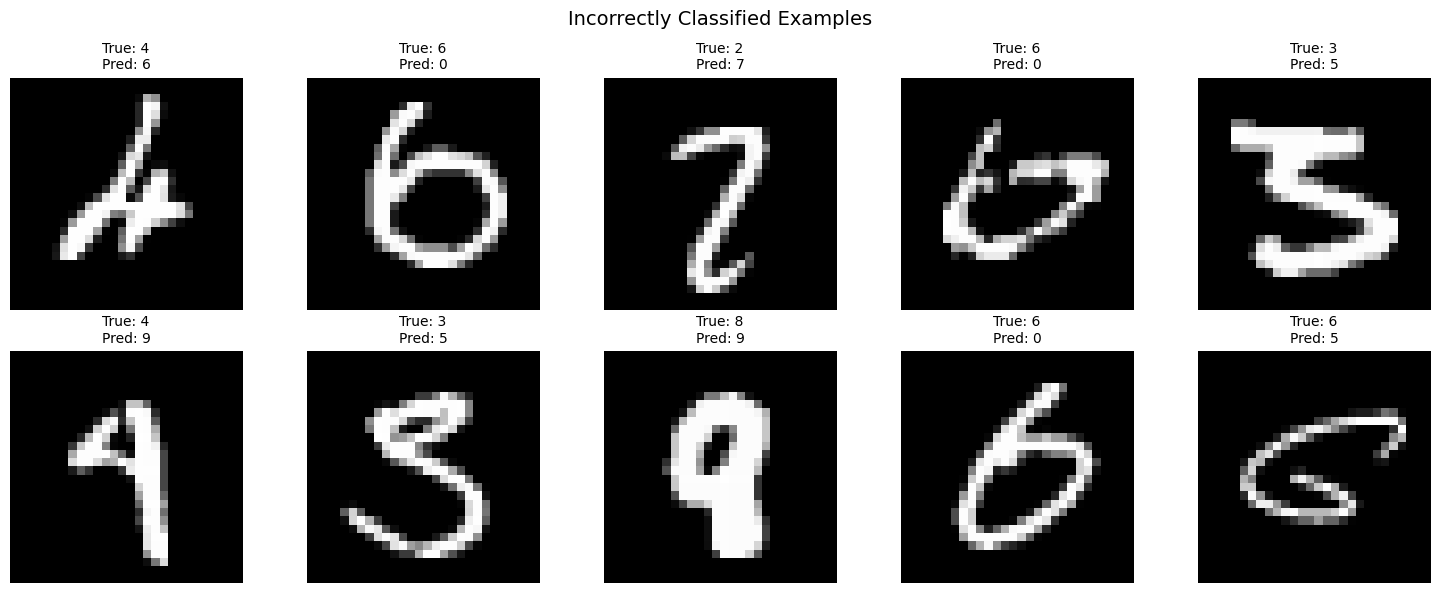


Most Common Misclassifications:
----------------------------------------
True -> Predicted : Count
  4 -> 9 : 9
  6 -> 0 : 5
  4 -> 6 : 4
  3 -> 5 : 4
  7 -> 2 : 4
  5 -> 3 : 4
  2 -> 7 : 3
  9 -> 4 : 3
  9 -> 5 : 3
  8 -> 9 : 2


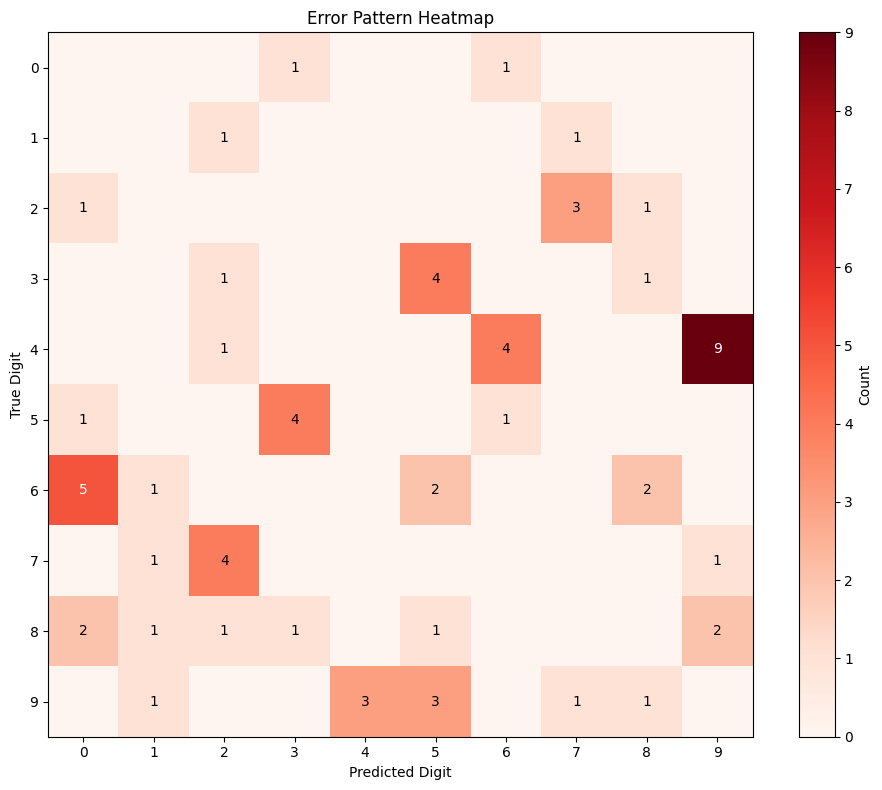

In [ ]:
# Exercise 18: Analyze correct and incorrect predictions
print("\nEXERCISE 18: ANALYZING PREDICTIONS")
print("=" * 50)

# Find indices of correctly and incorrectly classified images
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

print(f"Total test samples: {len(X_test)}")
print(f"Correctly classified: {len(correct_indices)} ({len(correct_indices)/len(X_test)*100:.2f}%)")
print(f"Incorrectly classified: {len(incorrect_indices)} ({len(incorrect_indices)/len(X_test)*100:.2f}%)")

# Visualize some correct predictions
print("\nVisualizing Correct Predictions:")
print("-" * 40)

num_examples = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(min(num_examples, len(correct_indices))):
    idx = correct_indices[i]
    ax = axes[i]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {true_classes[idx]}\nPred: {predicted_classes[idx]}', fontsize=10)
    ax.axis('off')

    # Add green border for correct predictions
    for spine in ax.spines.values():
        spine.set_edgecolor('green')
        spine.set_linewidth(2)

plt.suptitle('Correctly Classified Examples', fontsize=14)
plt.tight_layout()
plt.show()

# Visualize some incorrect predictions
print("\nVisualizing Incorrect Predictions:")
print("-" * 40)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(min(num_examples, len(incorrect_indices))):
    idx = incorrect_indices[i]
    ax = axes[i]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {true_classes[idx]}\nPred: {predicted_classes[idx]}', fontsize=10)
    ax.axis('off')

    # Add red border for incorrect predictions
    for spine in ax.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(2)

plt.suptitle('Incorrectly Classified Examples', fontsize=14)
plt.tight_layout()
plt.show()

# Analyze most common errors
print("\nMost Common Misclassifications:")
print("-" * 40)

error_pairs = {}
for idx in incorrect_indices[:100]:  # Look at first 100 errors
    pair = (true_classes[idx], predicted_classes[idx])
    error_pairs[pair] = error_pairs.get(pair, 0) + 1

# Sort by frequency
sorted_errors = sorted(error_pairs.items(), key=lambda x: x[1], reverse=True)

print("True -> Predicted : Count")
for (true, pred), count in sorted_errors[:10]:
    print(f"  {true} -> {pred} : {count}")

# Visualize error patterns
fig, ax = plt.subplots(figsize=(10, 8))

# Prepare data for visualization
error_matrix = np.zeros((10, 10))
for (true, pred), count in error_pairs.items():
    error_matrix[true, pred] = count

# Plot heatmap of errors
im = ax.imshow(error_matrix, cmap='Reds')
plt.colorbar(im, ax=ax, label='Count')

ax.set_xlabel('Predicted Digit')
ax.set_ylabel('True Digit')
ax.set_title('Error Pattern Heatmap')
ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Add text annotations
for i in range(10):
    for j in range(10):
        if error_matrix[i, j] > 0:
            ax.text(j, i, int(error_matrix[i, j]),
                   ha="center", va="center",
                   color="white" if error_matrix[i, j] > error_matrix.max()/2 else "black")

plt.tight_layout()
plt.show()

In [ ]:
# Advanced CNN with Data Augmentation
print("\nADVANCED: CNN WITH DATA AUGMENTATION")
print("=" * 50)

from keras.preprocessing.image import ImageDataGenerator

# Create data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,  # Usually False for digits
    fill_mode='nearest'
)

# Visualize augmented images
print("Visualizing Data Augmentation:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Take one sample image
sample_image = X_train[0].reshape(1, 28, 28, 1)

for i in range(10):
    ax = axes[i // 5, i % 5]
    # Generate augmented image
    for x_batch in datagen.flow(sample_image, batch_size=1):
        ax.imshow(x_batch[0].reshape(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Augmentation {i+1}')
        break

plt.suptitle('Data Augmentation Examples', fontsize=14)
plt.tight_layout()
plt.show()

# Build an enhanced model
print("\nBuilding Enhanced CNN Model with Regularization...")
enhanced_model = Sequential([
    # First block with Batch Normalization
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
           padding='same', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second block
    Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten and dense layers
    Flatten(),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile enhanced model
enhanced_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nEnhanced Model Architecture:")
print("-" * 40)
enhanced_model.summary()

# Train with data augmentation
print("\nTraining Enhanced Model with Data Augmentation...")
enhanced_history = enhanced_model.fit(
    datagen.flow(X_train, y_train_categorical, batch_size=128),
    steps_per_epoch=len(X_train) // 128,
    epochs=10,
    validation_data=(X_test, y_test_categorical),
    callbacks=callbacks,
    verbose=1
)

# Evaluate enhanced model
enhanced_test_loss, enhanced_test_accuracy = enhanced_model.evaluate(
    X_test, y_test_categorical, verbose=0
)

print(f"\nEnhanced Model Performance:")
print(f"Test Accuracy: {enhanced_test_accuracy * 100:.2f}%")
print(f"Test Loss: {enhanced_test_loss:.4f}")

# Compare models
print("\nMODEL COMPARISON:")
print("=" * 40)
print(f"Basic CNN Model:     {test_accuracy * 100:.2f}% accuracy")
print(f"Enhanced CNN Model:  {enhanced_test_accuracy * 100:.2f}% accuracy")
print(f"Improvement:         {(enhanced_test_accuracy - test_accuracy) * 100:+.2f}%")


ADVANCED: CNN WITH DATA AUGMENTATION


ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.12/dist-packages/keras/preprocessing/image/__init__.py)

In [ ]:
# Workshop Summary
print("\nWORKSHOP 10: COMPUTER VISION SUMMARY")
print("=" * 60)

print("\nKEY CONCEPTS COVERED:")
print("1. IMAGE PROCESSING FUNDAMENTALS:")
print("   ✓ Loading and displaying images (OpenCV, Keras)")
print("   ✓ Color space conversions (BGR ↔ RGB)")
print("   ✓ Grayscale conversion and histogram analysis")
print("   ✓ Image cropping, resizing, and basic transformations")

print("\n2. CONVOLUTIONAL NEURAL NETWORKS:")
print("   ✓ Convolution layers for feature extraction")
print("   ✓ Pooling layers for dimensionality reduction")
print("   ✓ Flatten and dense layers for classification")
print("   ✓ Softmax activation for multi-class classification")

print("\n3. MODEL DEVELOPMENT:")
print("   ✓ Data preprocessing and normalization")
print("   ✓ One-hot encoding for categorical labels")
print("   ✓ Model architecture design and compilation")
print("   ✓ Training with validation monitoring")
print("   ✓ Performance evaluation and analysis")

print("\n4. ADVANCED TECHNIQUES:")
print("   ✓ Data augmentation for improved generalization")
print("   ✓ Regularization techniques (Dropout, BatchNorm)")
print("   ✓ Callbacks for training optimization")
print("   ✓ Error analysis and visualization")

print("\n5. PRACTICAL SKILLS:")
print("   ✓ Working with MNIST dataset")
print("   ✓ Building end-to-end image classifiers")
print("   ✓ Analyzing model predictions and errors")
print("   ✓ Implementing best practices for CV projects")

print("\nKEY INSIGHTS:")
print("• OpenCV provides low-level image processing capabilities")
print("• Keras/TensorFlow enables high-level deep learning workflows")
print("• CNNs are specifically designed for image data")
print("• Data augmentation helps prevent overfitting")
print("• Regularization is crucial for deep networks")
print("• Visualization is key for understanding model behavior")

print("\nNEXT STEPS:")
print("1. Experiment with more complex datasets (CIFAR-10, ImageNet)")
print("2. Explore transfer learning with pre-trained models")
print("3. Try different CNN architectures (ResNet, VGG, Inception)")
print("4. Implement object detection and segmentation")
print("5. Work on real-world computer vision projects")

print("\nNote: For the assessment, ensure you understand:")
print("- How to preprocess image data for neural networks")
print("- The role of each CNN layer type")
print("- How to evaluate and improve model performance")
print("- Techniques for visualizing and interpreting results")